In [1]:
import pandas as pd
df = pd.read_csv('heart_disease.csv/processed.cleveland.data', header=None)

In [2]:
print(df.head())

     0    1    2      3      4    5    6      7    8    9    10   11   12  13
0  63.0  1.0  1.0  145.0  233.0  1.0  2.0  150.0  0.0  2.3  3.0  0.0  6.0   0
1  67.0  1.0  4.0  160.0  286.0  0.0  2.0  108.0  1.0  1.5  2.0  3.0  3.0   2
2  67.0  1.0  4.0  120.0  229.0  0.0  2.0  129.0  1.0  2.6  2.0  2.0  7.0   1
3  37.0  1.0  3.0  130.0  250.0  0.0  0.0  187.0  0.0  3.5  3.0  0.0  3.0   0
4  41.0  0.0  2.0  130.0  204.0  0.0  2.0  172.0  0.0  1.4  1.0  0.0  3.0   0


In [3]:
columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs",
    "restecg", "thalach", "exang", "oldpeak", "slope",
    "ca", "thal", "target"
]

df = pd.read_csv('heart_disease.csv/processed.cleveland.data', header=None, names=columns)
print(df.head())

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  target  
0    3.0  0.0  6.0       0  
1    2.0  3.0  3.0       2  
2    2.0  2.0  7.0       1  
3    3.0  0.0  3.0       0  
4    1.0  0.0  3.0       0  


In [4]:
print(df.info())       # Data types and non-null counts
print(df.describe())   # Summary stats
print(df.isnull().sum())  # Null count per column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB
None
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.15841

In [5]:
# Convert '?' to NaN
df.replace('?', pd.NA, inplace=True)

# Check again for nulls
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


In [6]:
# Drop rows with missing values (or fill if you prefer)
df.dropna(inplace=True)

# Convert to numeric
df['ca'] = df['ca'].astype(float)
df['thal'] = df['thal'].astype(float)

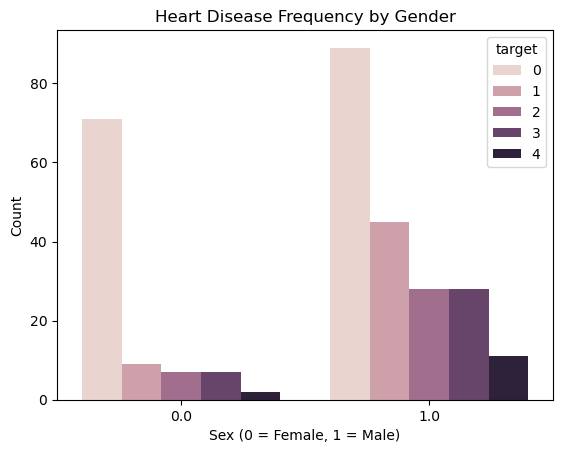

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sex', hue='target', data=df)
plt.title('Heart Disease Frequency by Gender')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.show()

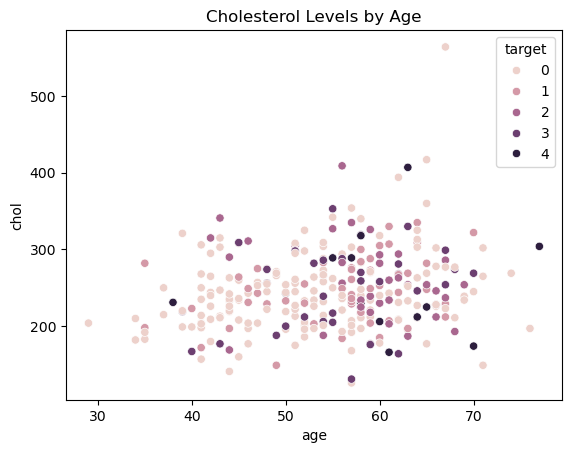

In [9]:
sns.scatterplot(x='age', y='chol', hue='target', data=df)
plt.title('Cholesterol Levels by Age')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = df.drop('target', axis=1)
y = df['target'].astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

preds = model.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.78      0.97      0.86        36
           1       0.00      0.00      0.00         9
           2       0.40      0.40      0.40         5
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         3

    accuracy                           0.62        60
   macro avg       0.24      0.27      0.25        60
weighted avg       0.50      0.62      0.55        60



In [11]:
df.to_csv('cleaned_heart_data.csv', index=False)